### GCP enviroment setup:
only run the following code block if using GCP, if running this notebook Localy files can be downloaded from <https://courses.education.jax.org/courses/894/modules>

In [ ]:
!gsutil cp gs://jax-presgraves-edusumner2-courses-code/IntrotoPythonII_2025/Module_4_material/*.csv /content/

data sets:
-----------------
   1. malariaMaize.csv
   2. mammals.csv
       * find it here: https://zief0002.github.io/bespectacled-antelope/codebooks/mammals.html
       * demonstration of how to read it into your notebook is in the cell (almost) below
   3. titanic_pandas
      * titanic_pandas.csv
      * find it here: https://github.com/pandas-dev/pandas/blob/main/doc/data/titanic.csv
   4. gapminder
      * maternal_mortality_ratio_per_100000_live_births.csv
          --> we will work through together to see what we can discover using tools gleaned from our titanic analysis.

Resources:
------
1. Same as pythontutor.com there is..... ta da! **https://pandastutor.com/**
2. Ten minutes to pandas (really good!): https://pandas.pydata.org/docs/user_guide/10min.html
3. handy, dandy cheat sheet for pandas: http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
4. pandas documentation here: http://pandas.pydata.org/pandas-docs/stable/

```
"Good data scientists understand, in a deep way, that the heavy lifting of cleanup and preparation are not something that gets in the way of solving the problem: it IS the problem" - DJ Patil
```

Tidy data:
1. each variable is in a column
2. each observation is a row
3. one table for each type of data

Clean Data:
* data cleaning is the process of detecting and removing data records that are: incomplete, irrelevant, inaccurate, and does not contain duplicates.


In [ ]:
# NOTE:
# ----------------------------------
# if you are using colab, in order to load the datafiles you will need to use the following commands
# (note that this is similar to the file.choose() command in R, if you have worked with R before)
# this places the data files in the 'content' folder with a path that looks like this: /content/malariaMaize.csv
# you will want to load malariaMaize.csv, and maternalMortality.csv, and Titanic_pandas.csv
# ---------------------------------- unhash the two lines below:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
import pandas as pd

In [ ]:
# in order to also have your online datasets available:
url = "https://raw.githubusercontent.com/zief0002/bespectacled-antelope/main/data/mammals.csv"

mammals= pd.read_csv(url)
mammals.head()

,species,body_weight,brain_weight,slow_wave,paradox,total_sleep,lifespan,gestation,predation,exposure,danger
0,African elephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,Arctic fox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arctic ground squirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


### PANDAS

__Data manipulation and cleaning__

* We often want to use data that is **heterogeneous** - a fancy word for data that is of different types. The most familiar type of heterogenous data for most people is an excel spreadsheet. In python, we have already seen tuples which allows for heterogeneous data.

* used most often for "data munging" which really means creating clean, easily used data sets

* two workhorse structures are: __Series__ and __DataFrame__

* methods associated with pandas dataframes that make data manipulation much easier than with standard python datatypes

* we can run basic plots using pandas methods (but mostly use matplotlib)

* Subsetting and grouping are probably the most powerful aspects of PANDAS.

__Series__
* one-dimensional array-like object that contains a sequence of values and an associated array of data labels (index) - the index means that when you print out a series object, it will display the index on the left and the actual associated values in the series on the right.
* you can also think about Series as a fix-length, ordered dictionary. In fact, you can convert dictionaries into Series.  
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

In [ ]:
# we often bring in modules in an abbreviated alias format.
# this allows us to call functions within that module with a shorter name
# i.e. pd.read_csv() instead of pandas.read_csv()
import pandas as pd

In [ ]:
# series example:
# Note: because we didn't provide an index, the default one was automatically given
obj1 = pd.Series([4,7,-5,3])
print("Here is a Series with default index: ")
print(obj1)
# we could explicitly give an index
obj2 = pd.Series([1,4,9,16,25,36],index = ['a','b','c','d','e','f'])
print( "Here is a series with a user-specified index: ")
print(obj2)
print("you can print out just the index with a method called, unsurprisingly, .index which is an attribute not a method so there are no ()")
print(obj2.index)
print("````````````````````````````")
print("We can apply Boolean conditions! Also to dataframes when we learn them next...")
print(obj2[obj2>24])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("We can use broadcasting to apply math to each element")
print(obj2*2)
print(" We can convert dictionaries to Series: ")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
dic_example = {'zebras':2, 'lion':4,'kookaburra':5}
obj3 = pd.Series(dic_example)
print(obj3)
print("Series objects automatically align via index. So if you added obj3 to obj3, the animals would align and the summation would take place over the associated numbers.")
print(obj3+obj3)

Here is a Series with default index: 
0    4
1    7
2   -5
3    3
dtype: int64
Here is a series with a user-specified index: 
a     1
b     4
c     9
d    16
e    25
f    36
dtype: int64
you can print out just the index with a method called, unsurprisingly, .index which is an attribute not a method so there are no ()
Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')
````````````````````````````
We can apply Boolean conditions!
e    25
f    36
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
We can use broadcasting to apply math to each element
a     2
b     8
c    18
d    32
e    50
f    72
dtype: int64
 We can convert dictionaries to Series: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
zebras        2
lion          4
kookaburra    5
dtype: int64
Series objects automatically align via index. So if you added obj3 to obj3, the animals would align and the summation would take place over the associated numbers.
zebras         4
lion           8
kookaburra    10
dtype: int64


__data frames__
* DataFrames allow you to store and manipulate tabular data in labeled rows of observations and columns of variables.
* Each column contains a pandas Series.
* There are associated methods and utilites for working with data.
        * especially: .mean(), describe(), median()
        * REALLY USEFUL (and similar to what we will see in SQLite package in module 5A):
              * we will work through examples of some of them, but don't have time to visit every single one so I encourage you to spend some time playing with them yourself since it will pay off for you later!
  
| Manipulation   | Description                                                     |
|:-------|:------------------------------------------------------------------------|
| select  | select which columns to include in dataset via slicing                            |
| filter    | filter dataset to include specified rows via booelan conditions, use [] for series and [[]] for dataframes|
| mutate | add a new column based on values in other columns (like summing etc). You can use .assign() method |
| groupby | group values to apply a function within the specified groups (we'll see this in the titanic dataset in many permutations) |
| summarize | calculate specified summary metric of a specified variable |
| arrange  | sort rows ascending or descending order of a specified column |
| merge | join separate datasets into a single dataset based on a common column |

* There are some rules about how to set up data frames that follow Hadley Wickham's conventions (He is an important fellow in the R world - he created ggplot, the tidyverse, and is one of the main innovators behind RStudio/Posit).
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

* There are several ways to create a DataFrame. One way (like the above example with Series) is to use a dictionary.
For example:

In [ ]:
# create  dictionary using plain PYTHON. This is probably the easiest way to do this.
dict = {"country": ["Brazil", "Russia", "India", "China", "South Africa"],
       "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
       "area": [8.516, 17.10, 3.286, 9.597, 1.221],
       "population": [200.4, 143.5, 1252, 1357, 52.98] }
# -----------------------------
# turn this dictionary into a pandas dataframe called
# BRICS - Brazil.Russia.India.China.SouthAfrica
# -----------------------------
# remember the structure: module_name.methodfrommodule(arguments). We used pd as the alias for importing the pandas module. DataFrame is a method.
brics = pd.DataFrame(dict)
print(brics)
#default index is provided.

        country    capital    area  population
0        Brazil   Brasilia   8.516      200.40
1        Russia     Moscow  17.100      143.50
2         India  New Dehli   3.286     1252.00
3         China    Beijing   9.597     1357.00
4  South Africa   Pretoria   1.221       52.98


In [ ]:
# Set a novel index for brics - that is, this doesn't just represent an existing column, like country
brics.index = ["BR", "RU", "IN", "CH", "SA"]
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Change the indexing from the default 0-->4 to BR, RU, IN, CH, SA")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# Print out brics with new index values
print(brics)

# Note: you can also convert a list into a pandas dataframe, too!

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Change the indexing from the default 0-->4 to BR, RU, IN, CH, SA
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
         country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Dehli   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98


In [ ]:
# THIS IS VERY EXCITING - you can import files, .csv are popular, in a manner similar to the one provided by R!
# here we import the malaria maize data set
#---------------------
# Note: your filepath will possibly look different depending on where you placed the
# malariaMaize.csv file or if you are using colab and uploading files.
#---------------------
mal_maize = pd.read_csv("malariaMaize.csv")
mal_maize.head()
# we could over ride the default index and insist that the index be the Villages column.
mal_maize.set_index("Villages",inplace=True)
# Print out dataset
print(mal_maize.head(2))
print(mal_maize.tail())
print("Total elements: ", mal_maize.size, " \nShape of the table: ", mal_maize.shape)

         Maize_yield  mean_elevation_(m)  person-years  \
Villages                                                 
Gulim           High                2050         23458   
Denbun          High                2050         20630   

          Number_of_malaria_cases  IncidenceRate/10000  
Villages                                                
Gulim                         683                  291  
Denbun                         88                   43  
              Maize_yield  mean_elevation_(m)  person-years  \
Villages                                                      
Shakawa               Low                2200         17441   
Agnifereda            Low                2450         17309   
Jibgedel              Low                2450         15570   
Bokotabo              Low                1770          7319   
Gedam Lijamor         Low                1850          8836   

               Number_of_malaria_cases  IncidenceRate/10000  
Villages                           

In [ ]:
# select: via SLICING! AKA: indexing
mal_maize = pd.read_csv("malariaMaize.csv")
# selecting
# Print out number of cases column as Pandas Series: SINGLE SQUARE BRACKET
print("Here it is as a series:")
print(mal_maize['Number_of_malaria_cases'])

print("------------------------------")
print("Here it is as a DataFrame")
# Print out number of cases column as Pandas DataFrame: DOUBLE SQUARE BRACKET
print(mal_maize[['Number_of_malaria_cases']])
print("------------------------------")
# see the difference between Series and Dataframe?
# DF includes column names, for one thing.

# Print out DataFrame with number of cases and Maize_yield columns
print(mal_maize[['Number_of_malaria_cases', 'Maize_yield']])
print("malaria cases with conditions. How about only including when case > 500")

# filter: boolean filter!
print(mal_maize[mal_maize['Number_of_malaria_cases']>500])
# print(mal_maize.loc[mal_maize['Number_of_malaria_cases']>500])
print("~~~~~~~~~~~~~")
# select:
# Print out first 4 observations/rows: SLICING
print(mal_maize[0:4])

# Print out fifth, sixth, and seventh observation/row
print(mal_maize[4:7])

print("------------------------------")
print("Here is an example of iloc - although just pulling out columns is easier")
# Print out 3rd observation/row using index (indexing starts at 0 so this should be
# for Wadra)
print(mal_maize.iloc[:,0:2])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# there is a difference between iloc[index position] and loc[name of position] but in this case, since the
# index is default, they should be accessed the same way.
print(mal_maize.loc[0:3])


Here it is as a series:
0      683
1       88
2      170
3      370
4      226
5      552
6      857
7      395
8       71
9      218
10     180
11     177
12      94
13       5
14       8
15      79
16      66
17       5
18      23
19    2359
20     398
Name: Number_of_malaria_cases, dtype: int64
------------------------------
Here it is as a DataFrame
    Number_of_malaria_cases
0                       683
1                        88
2                       170
3                       370
4                       226
5                       552
6                       857
7                       395
8                        71
9                       218
10                      180
11                      177
12                       94
13                        5
14                        8
15                       79
16                       66
17                        5
18                       23
19                     2359
20                      398
----------------------------

One of the most appropriate comics for this applied programming course:
    
https://xkcd.com/2054/

or.... when my code shouldn't work but does anyway:
https://i.imgur.com/0wH2jSc.gifv

and...(yeah, I can do this all day):
https://www.reddit.com/r/ProgrammerHumor/comments/9u2cx6/updating_your_project_is_such_a_a_pain_sometimes/


Tangentially: Articles that you may be interested in:

Pandas creator, Wes McKinney, and why he created it:
https://qz.com/1126615/the-story-of-the-most-important-tool-in-data-science/

** If you manage to integrate this into your learning, you will be unstoppable in whatever career you pursue: **storytelling**, that is pulling a clear narrative out of messy data, is one of the most powerful and essential parts of being an effective scientist. We are hardwired to storytell as humans, and data science - and data visualization - is fundamentally about learning tools that help you tease out the 'story' of your data.  Learning to tell stories (note: not lies or anecdotes but powerful cohesive explanations of the patterns in the data that are accessible to your audience) is one of the most important and valued skills you will develop as scientists. It is also one of the hardest. PANDAS STRENGTH IS THAT IT MAKES IT AS EASY AS POSSIBLE FOR YOU TO LEARN THE DIFFICULT SKILL OF TRANSFORMING YOUR DATA INTO A COMPELLING STORY.**

How popular is pandas and why?
https://stackoverflow.blog/2017/09/14/python-growing-quickly/


## In lecture example:
* Are body mass and brain mass related in mammals?
Read in the mammals.csv file (found here: https://raw.githubusercontent.com/zief0002/bespectacled-antelope/main/data/mammals.csv) to investigate this question with plots: Graph body mas versus brain mass. Label the axes. We will use Mathplotlib.pyplot.

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html

In [ ]:
# I showed you how to do this at the top of the notebook, too so this might already be read into memory.
url = "https://raw.githubusercontent.com/zief0002/bespectacled-antelope/main/data/mammals.csv"
mammals=pd.read_csv(url)


tangent: matplotlib is part of our 'stack'. We will see a couple of examples of it, but it is for plotting data.

The cell below is how you would typically read in your entire stack (and you would put it at the top of your notebook).

https://matplotlib.org/stable/gallery/index.html

https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

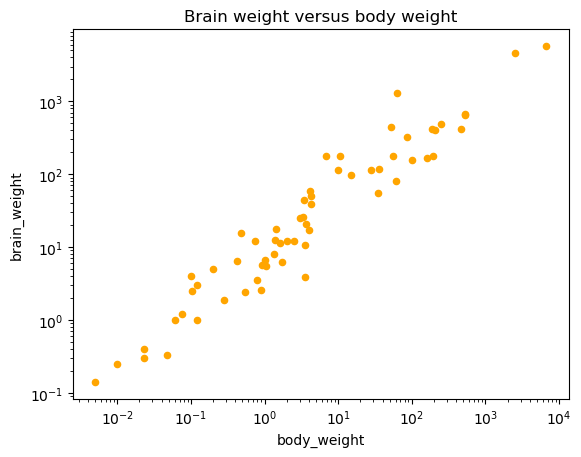

In [ ]:
# the plot function can take a number of different kinds: bar, hist, box,area, scatter, pie etc.
# once again: if you have any familiarity with R, this format will be comfortable for you!
mammals.plot(kind = 'scatter', x = "body_weight", y = "brain_weight",title= "Brain weight versus body weight",color="orange")
plt.yscale("log")
plt.xscale("log")
plt.show()

## Moving on...working through examples

* We need to save our files in csv (comma separated format) or tsv (tab separated format with the default argument delimiter='\t'). If using tab separated data, you will need to use the argument in the **pd.read_csv(file_name,delimiter='\t')**.I have included some publicly available data sets from the famous data visualization website gapminder.org. In case you don't know this was the data visualization project of the late Hans Rosling who gave probably the most effective TED talk of all time (https://www.gapminder.org/videos/hans-rosling-ted-talk-2007-seemingly-impossible-is-possible/). Data visualization is THE MOST EFFECTIVE TOOL THAT YOU HAVE AT YOUR DISPOSAL; use it responsibly, please! You can find the data (download  maternal mortality (under the health tab) and child death located here: https://www.gapminder.org/data/

* note that the maternal mortality file has columns that are each year (1800, 1850, 2013 etc).

1. We are going to read in the file contents and save files.
    * We are going to properly read in the file contents by assigning the file contents to a variable so that we can access them in memory by simply calling the super easy variable name

2. We will see some basic tools of data exploration (.head(), .tails(), .info(), shape etc), sort_values(), mean(), median()

3. We will subset our data using slicing and loc() versus iloc()
    * there is a straightforward explanation (in my opinion) of the difference between loc() and iloc() here - https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different

4. We will delete columns and rows and learn how to concatenate dataframes

5. split-apply-combine methods like groupby and aggregate
    

                                    ***THERE IS WHERE WE ENDED ON DAY 4 in 2024 & 2025***

### IN LECTURE exercise: Let's take a look at the titanic dataset

* if you have already taken Intro to R I, you have already had your fill of the titanic dataset but we are, after all, trying to
demonstrate that you can use python tools to get much of the functionality of R so....sorry?

1. download titanic

titanic_data = pd.read_csv("titanic_pandas.csv")

Note: There are varying accounts of the exact numbers of passengers and crew on the Titanic but it is usually approx 2240 with approx 706 surviving. The data set we will use is a much smaller dataset of some passengers (1309) (according to wikipedia there were approximately 1317 passengers).  

2. let's be nosy (like all Data Scientists) and do some data peeking

a. how many rows and columns?
b. can we look into the last 12 rows?
I have downloaded this from GitHub:
https://github.com/pandas-dev/pandas/blob/main/doc/data/titanic.csv


In [ ]:
titanic_pandas = pd.read_csv("Titanic_pandas.csv")
#print(titanic_pandas)
print("~~~~~~~~~~~~~~~~~~~~")
print(titanic_pandas.columns)
print("~~~~~~~~~~~~~~~~~~~~")
print(titanic_pandas.sample(3))
print("-----------")
print(titanic_pandas.describe())
print(titanic_pandas.head(2))
print(titanic_pandas.shape)

~~~~~~~~~~~~~~~~~~~~
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~
      pclass  survived                         name     sex   age  sibsp  \
258      1.0       1.0      Serepeca, Miss. Augusta  female  30.0    0.0   
839      3.0       0.0  Gustafsson, Mr. Karl Gideon    male  19.0    0.0   
1057     3.0       1.0  Nicola-Yarred, Miss. Jamila  female  14.0    1.0   

      parch  ticket     fare cabin embarked boat  body  \
258     0.0  113798  31.0000   NaN        C    4   NaN   
839     0.0  347069   7.7750   NaN        S  NaN   NaN   
1057    0.0    2651  11.2417   NaN        C    C   NaN   

                       home.dest  
258                          NaN  
839   Myren, Sweden New York, NY  
1057                         NaN  
-----------
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.00

### In Lecture Exercise on Titanic
1. how to sort the data set by gender
2. how about survival? Survival is coded as: 0 (died),1 (survived)

In [ ]:
# groupby is AMAZING. It emulates a lot of the functionality of SQL!
# .groupby(names of the column to group on)[column(s) on which to perform the method].method()
# remember the python tutorial example about dog breeds - they used groupby in that query!
print(titanic_pandas.groupby('pclass')['age'].mean())
#print(titanic_pandas.groupby('survived')['age'].mean())
print("~~ NOT THE SAME THING AS USING DOUBLE BRACKETS: double brackets is a dataframe, single is a series~~~")
print(titanic_pandas[['pclass','age']].mean())
print("~~~~~"*10)
print(titanic_pandas["pclass"].value_counts())
# How to sort the data by gender:
# fill in below with examples during class!
#
#
#

pclass
1.0    39.159918
2.0    29.506705
3.0    24.816367
Name: age, dtype: float64
~~ NOT THE SAME THING AS USING DOUBLE BRACKETS: double brackets is a dataframe, single is a series~~~
pclass     2.294882
age       29.881135
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
pclass
3.0    709
1.0    323
2.0    277
Name: count, dtype: int64


In [ ]:
# TITANIC data set - introducing some methods
# We can see the unique method in use for the titanic data set
print(titanic_pandas["embarked"].unique())
# We can get rid of the nan strings
print(titanic_pandas["embarked"].dropna().unique())
print(titanic_pandas["embarked"].value_counts())

['S' 'C' nan 'Q']
['S' 'C' 'Q']
embarked
S    914
C    270
Q    123
Name: count, dtype: int64


In [ ]:
# work through in class
# mean age of the classes, 1st, 2nd and 3rd class
print(titanic_pandas.groupby('pclass')['age'].mean())
#mean age of the classes and gender: we can select for more than one column at a time:
#print(titanic_pandas.groupby(FILL IN ))
#what about .count method?
#print(titanic_pandas.groupby(FILL IN ))
# how many survived -let's use .sum()
# FILL IN
print("$$$$$$$$$$")
#print(titanic_pandas.groupby(FILL IN ))
print("------------aggregate function --------------")
#aggregate function!
print(titanic_pandas.groupby('age').aggregate('sum'))

pclass
1.0    39.159918
2.0    29.506705
3.0    24.816367
Name: age, dtype: float64
                     age  survived
pclass sex                        
1.0    female  37.037594  0.965278
       male    41.029250  0.340782
2.0    female  27.499191  0.886792
       male    30.815401  0.146199
3.0    female  22.185307  0.490741
       male    25.962273  0.152130
pclass  sex   
1.0     female    133
        male      151
2.0     female    103
        male      158
3.0     female    152
        male      349
Name: age, dtype: int64
$$$$$$$$$$
pclass  sex   
1.0     female    139.0
        male       61.0
2.0     female     94.0
        male       25.0
3.0     female    106.0
        male       75.0
Name: survived, dtype: float64
------------aggregate function --------------
         pclass  survived                                               name  \
age                                                                            
0.1667      3.0       1.0            Dean, Miss. Elizabeth

In [ ]:
# Missing data is a whole can of worms when dealing with data grooming
# I would argue that Data cleaning IS the heart of Data science because it exposes you to the limitations of the data and the biases it
# holds.
# check for missing values -- we know that it has missing values because we saw NA earlier
titanic_pandas.isnull()
# you can see how many missing values are in each column
titanic_pandas.isnull().sum(axis='rows')
# how to deal with missing values:
#1. you can drop rows with missing values: in this case every row has some pieces of missing information so it is probably not a great strategy
no_titanic_missing = titanic_pandas.dropna()
print(no_titanic_missing.shape)
#2. you could fill in missing values - but that isnt useful in this case. Here is how you could do it if you wanted to fill in missing
# values with the mean value for that column.
filled_titanic_pandas = titanic_pandas.fillna(titanic_pandas['age'].mean())
print(filled_titanic_pandas)


(0, 14)
         pclass   survived                                             name  \
0      1.000000   1.000000                    Allen, Miss. Elisabeth Walton   
1      1.000000   1.000000                   Allison, Master. Hudson Trevor   
2      1.000000   0.000000                     Allison, Miss. Helen Loraine   
3      1.000000   0.000000             Allison, Mr. Hudson Joshua Creighton   
4      1.000000   0.000000  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...         ...        ...                                              ...   
1305   3.000000   0.000000                            Zabour, Miss. Thamine   
1306   3.000000   0.000000                        Zakarian, Mr. Mapriededer   
1307   3.000000   0.000000                              Zakarian, Mr. Ortin   
1308   3.000000   0.000000                               Zimmerman, Mr. Leo   
1309  29.881135  29.881135                                        29.881135   

            sex        age      sibsp      

### In-lecture titanic data:
1. how many children survived who were 5 or under years old?
2. How many children 5 or under were on the titanic in the first place?
3. How many children 5 or under survived and print out their class, sex and age

you might want to open the titanic_pandas data file (or aggregate the max, min values etc) to determine what the data of the columns. There is an Age column that is in years which is probably where we should start.

In [ ]:
print("How many children, 5 and under, were on the titanic?")
# FILL IN WITH LOGIC
print("How many children, 5 and under, survived the sinking of the Titanic?")
# FILL IN WITH LOGIC COMMAND

How many children, 5 and under, were on the titanic?
      pclass  survived                                      name     sex  \
1        1.0       1.0            Allison, Master. Hudson Trevor    male   
2        1.0       0.0              Allison, Miss. Helen Loraine  female   
94       1.0       1.0                 Dodge, Master. Washington    male   
339      2.0       1.0                 Becker, Master. Richard F    male   
340      2.0       1.0               Becker, Miss. Marion Louise  female   
359      2.0       1.0             Caldwell, Master. Alden Gates    male   
427      2.0       1.0                 Hamalainen, Master. Viljo    male   
478      2.0       1.0                     Laroche, Miss. Louise  female   
479      2.0       1.0  Laroche, Miss. Simonne Marie Anne Andree  female   
492      2.0       1.0                     Mallet, Master. Andre    male   
514      2.0       1.0            Navratil, Master. Edmond Roger    male   
515      2.0       1.0             

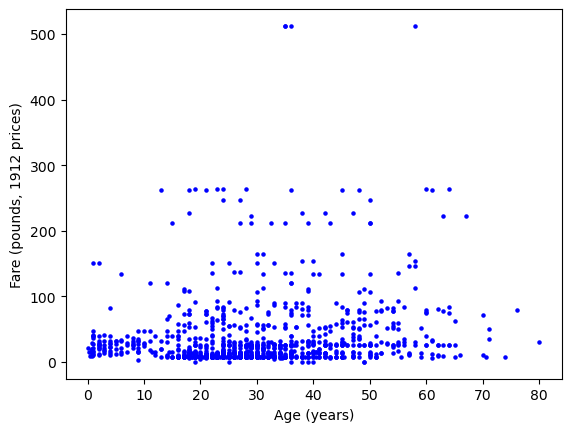

In [ ]:
# a few basic plots with Titanic:
titanic_scatter=titanic_pandas.plot.scatter('age', 'fare', c = "blue", s = 5, xlabel="Age (years)", ylabel="Fare (pounds, 1912 prices)")

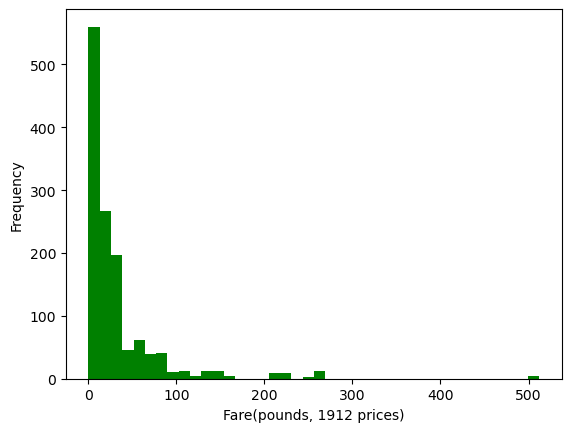

In [ ]:
titanic_hist = titanic_pandas.fare.plot.hist(bins = 40, color = 'green',xlabel='Fare(pounds, 1912 prices)')

(array([0, 1, 2]), [Text(0, 0, '1.0'), Text(1, 0, '2.0'), Text(2, 0, '3.0')])

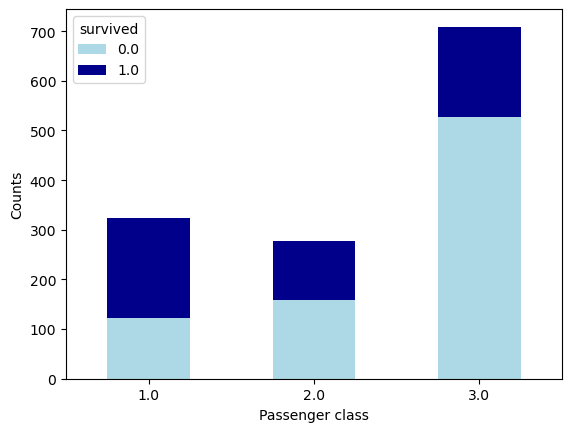

In [ ]:
# bar plot
contingency_titanic = titanic_pandas.groupby(['pclass', 'survived']).size().unstack()
titanic_barplot = contingency_titanic.plot.bar(stacked=True, xlabel="Passenger class",ylabel="Counts",color = ["lightblue", "darkblue"])
#titanic_barplot = contingency_titanic.plot.bar(color = ["lightblue", "darkblue"])
#plt.ylabel("Counts")
#plt.xlabel('Passenger class')
plt.xticks(rotation=0)
#plt.show(titanic_barplot)

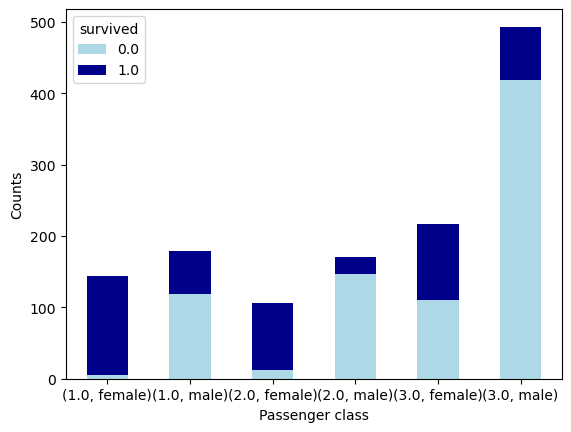

In [ ]:
contingency_titanic = titanic_pandas.groupby(['pclass',"sex","survived"]).size().unstack()
titanic_barplot = contingency_titanic.plot.bar(stacked=True,
                                               color = ["lightblue", "darkblue"])
plt.ylabel("Counts")
plt.xlabel('Passenger class')
plt.xticks(rotation=0)
#---------------------
plt.savefig('Titanic_tester.png')
plt.show(titanic_barplot)

# Now we will work through the maternalMortality dataset.
Work through the same type of analysis that we worked through in lecture with the maternal mortality data set from the gapminder website. Please use groupby to answer at least one of the questions and plot the results, like we did in lecture.
a.	What patterns do you see over time and between countries? You will need to plot your data to answer this. Do your data suggest any trends or major changes inmaternald mortality?
b.	What is the meamaternalld mortality rate from the most recent year collected between countries?
c.	What is the range maternalild mortality (max, min) for the most recent year?
d.	Sort the countries from highest to lowmaternalhild mortality rate for the most recent year provide
https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png
https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png


In [ ]:
# 1. import with conventional alias of pd (note: we might want to put the full data analasys library stack here)
#import pandas as pd
# read in the maternal mortality (per 100,000 women giving birth)
# taken from the gapminder site: https://www.gapminder.org/data/
# -------------------------------------------------
# compare to the mm dataframe which is indexed in the default way
mm= pd.read_csv('maternalMortality.csv')
mm_country=pd.read_csv('maternalMortality.csv',index_col="country")

In [ ]:
print(mm_country.head(4))
print(mm_country.tail(4))
mm_country.shape
print(mm_country.info())
print(mm_country.describe())

             1800  1801  1802  1803  1804  1805  1806  1807  1808  1809  ...  \
country                                                                  ...   
Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angola        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Albania       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Andorra       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

             2004   2005  2006  2007  2008  2009   2010  2011  2012   2013  
country                                                                     
Afghanistan   NaN  730.0   NaN   NaN   NaN   NaN  500.0   NaN   NaN  400.0  
Angola        NaN  750.0   NaN   NaN   NaN   NaN  530.0   NaN   NaN  460.0  
Albania       NaN   24.0   NaN   NaN   NaN   NaN   21.0   NaN   NaN   21.0  
Andorra       NaN    NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN    NaN  

[4 rows x 214 columns]
              1800  1801  1802  1

In [ ]:
sorted_countries_2013=mm.sort_values(by="2013")
print(sorted_countries_2013)
print(mm[["country","1940"]])
print(mm[10:20])

                 country   1800   1801   1802   1803   1804   1805   1806  \
20               Belarus    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
82                Israel    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
135               Poland    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
56               Finland  825.0  835.0  868.0  807.0  789.0  842.0  758.0   
53                 Spain    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..                   ...    ...    ...    ...    ...    ...    ...    ...   
7    Antigua and Barbuda    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
46              Dominica    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
109     Marshall Islands    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
161           Seychelles    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
173               Taiwan    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

     1807    1808  ...  2004  2005  2006  2007  2008  2009  2010  2011  201

In [ ]:
mm2=pd.DataFrame(mm_country,columns=("1940","1950","1970","1990","2000","2013"))
print(mm2)

              1940  1950  1970    1990    2000   2013
country                                              
Afghanistan    NaN   NaN   NaN  1200.0  1100.0  400.0
Angola         NaN   NaN   NaN  1400.0  1100.0  460.0
Albania        NaN   NaN   NaN    31.0    28.0   21.0
Andorra        NaN   NaN   NaN     6.2     6.3    NaN
UAE            NaN   NaN   NaN    16.0    11.0    8.0
...            ...   ...   ...     ...     ...    ...
Samoa          NaN   NaN   NaN   150.0    89.0   58.0
Yemen          NaN   NaN   NaN   460.0   370.0  270.0
South Africa   NaN   NaN   NaN   150.0   150.0  140.0
Zambia         NaN   NaN   NaN   580.0   610.0  280.0
Zimbabwe       NaN   NaN   NaN   520.0   680.0  470.0

[189 rows x 6 columns]


             1920   1935   1945  1975  2000  2013
country                                          
Canada        NaN    NaN    NaN   NaN   7.0  11.0
China         NaN    NaN    NaN   NaN  63.0  32.0
USA         799.0  582.0  207.0  13.2  13.0  28.0
Kazakhstan    NaN    NaN    NaN   NaN  71.0  26.0
Sweden      401.0  256.0  133.0   4.4   5.0   4.0
Mexico        NaN    NaN    NaN   NaN  67.0  49.0
Ireland     487.0  467.0  237.0  15.2   6.0   9.0
France        NaN    NaN    NaN   NaN  10.0  12.0
~~~~~~~~~~


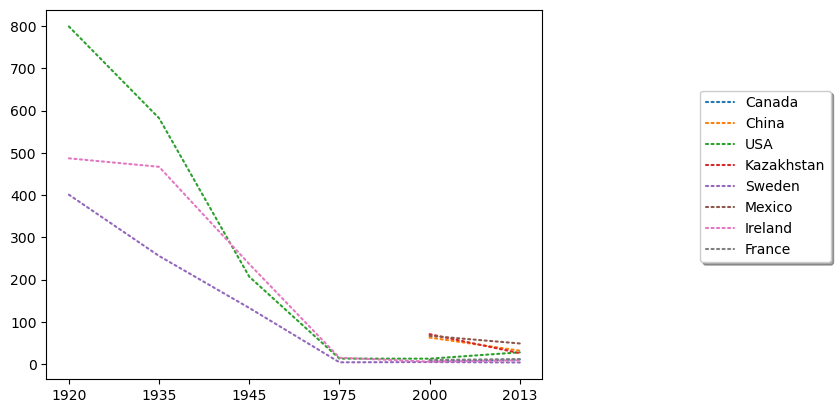

In [ ]:
mm_slice=mm_country.loc[["Canada","China","USA","Kazakhstan", "Sweden", "Mexico","Ireland","France"],["1920","1935","1945","1975","2000","2013"]]
print(mm_slice)
print("~~~~~~~~~~")
mm_slice.T.plot(ls=":",dash_capstyle="round")
#remember the matplotlib cheat sheets. For lines in a plot, I found that you can modify the line style, dashed or continguous, though the argument ls=
# as per Eva's question about moving the legend, I found this as one way to do it.
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)